# Content: 
   - [Importing Data](#1)
   - [Visualization](#2)
   - [Train and Test](#3)
   - [Convolutional Neural Network](#4)
   - [Evaluating the Model Performance](#5)
   - [Visualizing Predictons on the Validation Set](#6)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flowers-recognition/flowers/dandelion/34578947551_863af3acb3_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/2625836599_03e192266f.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/16242239484_51286673af.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/5716633491_55e6f02645_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/34697163155_5dc2571f23_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/34686041416_e50c8028f9_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/8719032054_9a3ce4f0ff.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9472854850_fc9e1db673.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/31530587330_ba31bd196e_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9293460423_7fbb1e3c32_n.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/9939430464_5f5861ebab.jpg
/kaggle/input/flowers-recognition/flowers/dandelion/2535769822_513be6bbe9.jpg
/kaggle/input/flowers-recognition/flowers/dande

<a id="1"></a>
# Importing Data

In [2]:
# Ignore the warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# data visualization and manipulation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

import cv2
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


In [3]:
print(os.listdir("/kaggle/input/flowers-recognition/flowers"))

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


In [4]:
X = []
Z = []

flower_daisy = "/kaggle/input/flowers-recognition/flowers/daisy"
flower_sunflower = "/kaggle/input/flowers-recognition/flowers/sunflower"
flower_tulip = "/kaggle/input/flowers-recognition/flowers/tulip"
flower_dandelion = "/kaggle/input/flowers-recognition/flowers/dandelion"
flower_rose = "/kaggle/input/flowers-recognition/flowers/rose"


In [5]:
def assign_label(img, flower_type):
    return flower_type

In [6]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150,150))
        
        X.append(np.array(img))
        Z.append(str(label))
    

In [7]:
make_train_data("Daisy",flower_daisy)
print(len(X))

100%|██████████| 764/764 [00:08<00:00, 91.30it/s]

764


In [8]:
make_train_data("Sunflower",flower_sunflower)
print(len(X))

100%|██████████| 733/733 [00:08<00:00, 85.63it/s]

1497


In [9]:
make_train_data("Tulip",flower_tulip)
print(len(X))

100%|██████████| 984/984 [00:11<00:00, 85.44it/s]

2481


In [10]:
make_train_data("Dandelion",flower_dandelion)
print(len(X))

100%|██████████| 1052/1052 [00:11<00:00, 88.84it/s]

3533


In [11]:
make_train_data("Rose",flower_rose)
print(len(X))

100%|██████████| 784/784 [00:08<00:00, 88.72it/s]

4317


<a id="2"></a>
# Visualization

In [12]:
f,ax = plt.subplots(7,3)
f.set_size_inches(15,15)
for i in range(7):
    for j in range(3):
        l = rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title("Flower: " + Z[l])

        
plt.tight_layout()
        

In [13]:
# Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/ 255

<a id="3"></a>
# Train and Test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 150, 150, 3)
x_test shape:  (864, 150, 150, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


<a id="4"></a>
# Convolutional Neural Network

In [15]:
# modelling 
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "Same", activation="relu", input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(5, activation="softmax"))


In [16]:
# Epochs and Batch Size
epochs = 50
batch_size = 32

In [17]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [18]:
# Compiling the Keras Model 
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [19]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 96)       0

In [20]:
# Fitting on the Training set and making predcitons on the Validation set
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size), 
                              epochs= epochs, 
                              validation_data=(x_test,y_test), 
                              verbose = 1, 
                              steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
107/107 [==============================] - 115s 1s/step - loss: 1.3268 - accuracy: 0.4081 - val_loss: 1.1778 - val_accuracy: 0.4734
Epoch 2/50
107/107 [==============================] - 112s 1s/step - loss: 1.1057 - accuracy: 0.5440 - val_loss: 1.1887 - val_accuracy: 0.5729
Epoch 3/50
107/107 [==============================] - 114s 1s/step - loss: 0.9929 - accuracy: 0.6077 - val_loss: 0.9082 - val_accuracy: 0.6551
Epoch 4/50
107/107 [==============================] - 113s 1s/step - loss: 0.9224 - accuracy: 0.6466 - val_loss: 0.9799 - val_accuracy: 0.6458
Epoch 5/50
107/107 [==============================] - 114s 1s/step - loss: 0.8536 - accuracy: 0.6709 - val_loss: 0.8612 - val_accuracy: 0.6782
Epoch 6/50
107/107 [==============================] - 112s 1s/step - loss: 0.8457 - accuracy: 0.6764 - val_loss: 0.7937 - val_accuracy: 0.7049
Epoch 7/50
107/107 [==============================] - 112s 1s/step - loss: 0.7838 - accuracy: 0.6992 - val_loss: 0.8137 - val_accuracy: 0.7049

<a id="5"></a>
# Evaluating the Model Performance

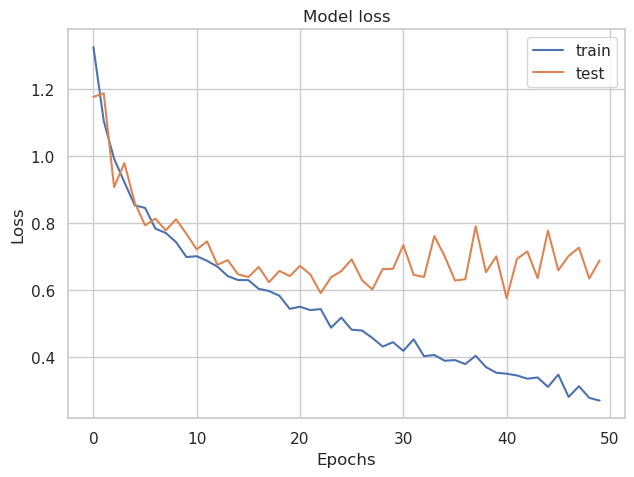

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.show()

<a id="6"></a>
# Visualizing Predictons on the Validation Set

In [23]:
# getting predictions on validation set
pred = model.predict(x_test)
predict_digits = np.argmax(pred, axis = 1)

27/27 [==============================] - 7s 244ms/step


In [24]:
# We will create two arrays to sort the correct and incorrect predictions and throw them in
i = 0
right_class = []
wrong_class = []

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) == predict_digits[i]):
        right_class.append(i)
    if(len(right_class) == 10):
        break

i = 0

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) != predict_digits[i]):
        wrong_class.append(i)
    if(len(wrong_class) == 10):
        break


In [25]:
count = 0
f,ax = plt.subplots(5,2)
f.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[right_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(labelEncoder.inverse_transform([predict_digits[right_class[count]]]))
                          +"\n"+"Actual Watch : "+str(labelEncoder.inverse_transform([np.argmax(y_test[right_class[count]])])))

        plt.tight_layout()
        count += 1

In [26]:
count = 0
f,ax = plt.subplots(5,2)
f.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[wrong_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(labelEncoder.inverse_transform([predict_digits[wrong_class[count]]]))
                          +"\n"+"Actual Watch : "+str(labelEncoder.inverse_transform([np.argmax(y_test[wrong_class[count]])])))

        plt.tight_layout()
        count += 1

**If you like it don't forget to vote**